<a href="https://colab.research.google.com/github/hongnhicao28/Churn-Iran-Report/blob/main/Final_Project_3_Churn_Iran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Dictionary
Link datasets: https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset

**Additional Information**

This dataset is randomly collected from an Iranian telecom company database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset
are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value.

All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.

**Anonymous Customer ID**
1. Call Failures: number of call failures
2. Complains: binary (0: No complaint, 1: complaint)
3. Subscription Length: total months of subscription
4. Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)
5. Seconds of Use: total seconds of calls
6. Frequency of use: total number of calls
7. Frequency of SMS: total number of text messages
8. Distinct Called Numbers: total number of distinct phone calls
9. Age Group: ordinal attribute (1: younger age, 5: older age) (Group 1: Under 20 years old, Group 2: 20 - 29 years old, Group 3: 30 - 39 years old, Group 4: 40 - 49 years old, Group 5: 50 years old and above)
10. Tariff Plan: binary (1: Pay as you go, 2: contractual)
11. Status: binary (1: active, 2: non-active)
12. Customer Value: The calculated value of customer
13. Churn: binary (1: churn, 0: non-churn) - Class label




# Dataset - Data Understanding

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iranian_churn = fetch_ucirepo(id=563)

# data (as pandas dataframes)
X = iranian_churn.data.features
y = iranian_churn.data.targets

# metadata
print(iranian_churn.metadata)

# variable information
print(iranian_churn.variables)


{'uci_id': 563, 'name': 'Iranian Churn', 'repository_url': 'https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/563/data.csv', 'abstract': "This dataset is randomly collected from an Iranian telecom company's database over a period of 12 months.", 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 3150, 'num_features': 13, 'feature_types': ['Integer'], 'demographics': ['Age'], 'target_col': ['Churn'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5JW3Z', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is randomly collected from an Iranian telecom companyâ€™s database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attribu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.concat([X, y], axis=1)
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
plt.rcParams['axes.facecolor'] = '#FFFFFF'

# Data preprocessing

## EDA

In [ ]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [ ]:
print(df['Complains'].value_counts(),'\n')
print(df['Tariff Plan'].value_counts(),'\n')
print(df['Status'].value_counts(),'\n')
print(df['Age Group'].value_counts(),'\n')
print(df['Charge  Amount'].value_counts(),'\n')
print(df['Churn'].value_counts())

Complains
0    2909
1     241
Name: count, dtype: int64 

Tariff Plan
1    2905
2     245
Name: count, dtype: int64 

Status
1    2368
2     782
Name: count, dtype: int64 

Age Group
3    1425
2    1037
4     395
5     170
1     123
Name: count, dtype: int64 

Charge  Amount
0     1768
1      617
2      395
3      199
4       76
5       30
8       19
9       14
7       14
6       11
10       7
Name: count, dtype: int64 

Churn
0    2655
1     495
Name: count, dtype: int64


<ipython-input-9-1cf822e356dd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Complains', data=df, palette='Blues')
<ipython-input-9-1cf822e356dd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Charge  Amount', data=df, palette='Blues')
<ipython-input-9-1cf822e356dd>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Group', data=df, palette='Blues')
<ipython-input-9-1cf822e356dd>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

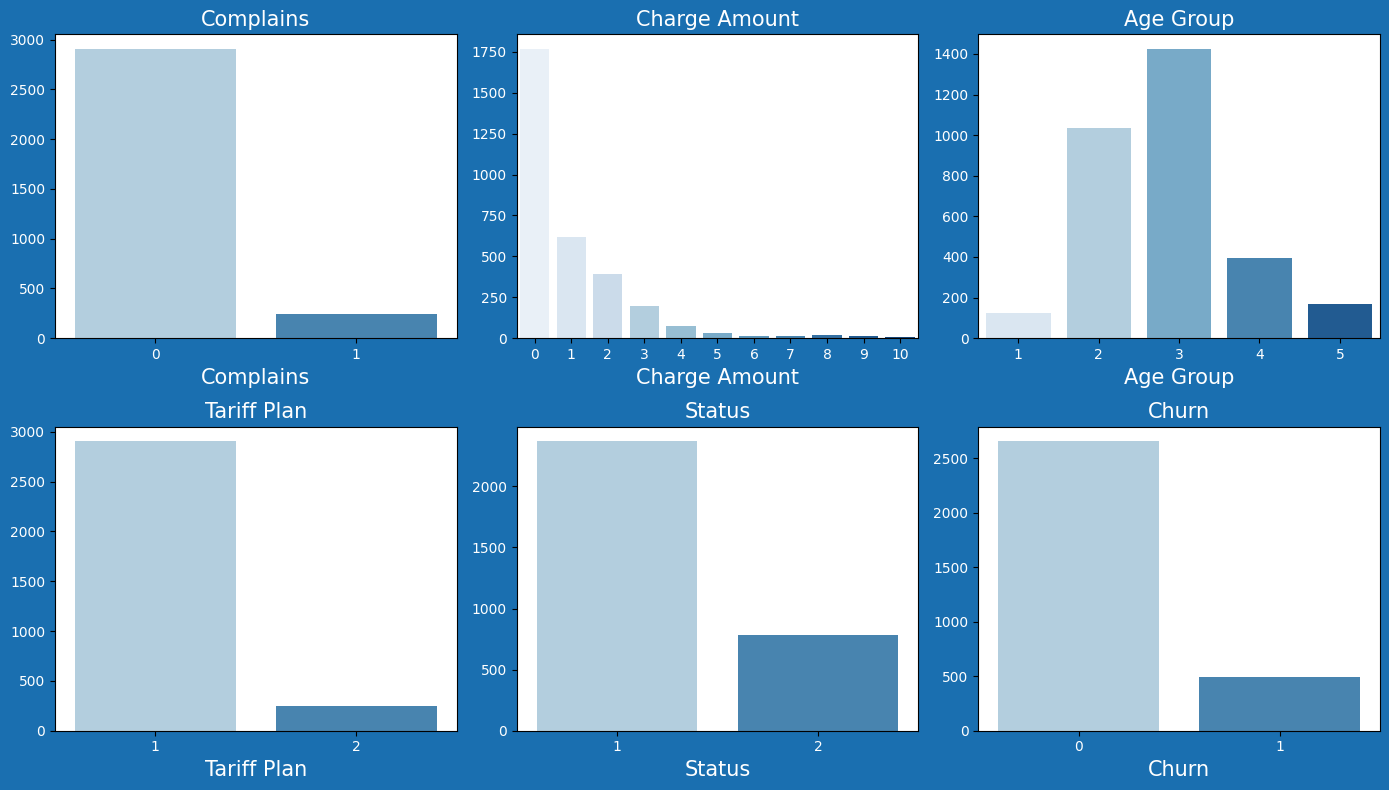

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
plt.gcf().set_facecolor('#1A6FB0')

sns.countplot(x='Complains', data=df, palette='Blues')
plt.title('Complains',fontsize=15, color='#FFFFFF' )
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Complains',fontsize=15, color='#FFFFFF')
plt.ylabel('')

plt.subplot(2, 3, 2)
sns.countplot(x='Charge  Amount', data=df, palette='Blues')
plt.title('Charge Amount',fontsize=15, color='#FFFFFF')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Charge Amount',fontsize=15, color='#FFFFFF')
plt.ylabel('')

plt.subplot(2, 3, 3)
sns.countplot(x='Age Group', data=df, palette='Blues')
plt.title('Age Group',fontsize=15, color='#FFFFFF')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Age Group',fontsize=15, color='#FFFFFF')
plt.ylabel('')

plt.subplot(2, 3, 4)
sns.countplot(x='Tariff Plan', data=df, palette='Blues')
plt.title('Tariff Plan',fontsize=15, color='#FFFFFF')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Tariff Plan',fontsize=15, color='#FFFFFF')
plt.ylabel('')

plt.subplot(2, 3, 5)
sns.countplot(x='Status', data=df, palette='Blues')
plt.title('Status',fontsize=15, color='#FFFFFF')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Status',fontsize=15, color='#FFFFFF')
plt.ylabel('')

plt.subplot(2, 3, 6)
sns.countplot(x='Churn', data=df, palette='Blues')
plt.title('Churn',fontsize=15, color='#FFFFFF')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Churn',fontsize=15, color='#FFFFFF')
plt.ylabel('')

plt.tight_layout()
plt.show()


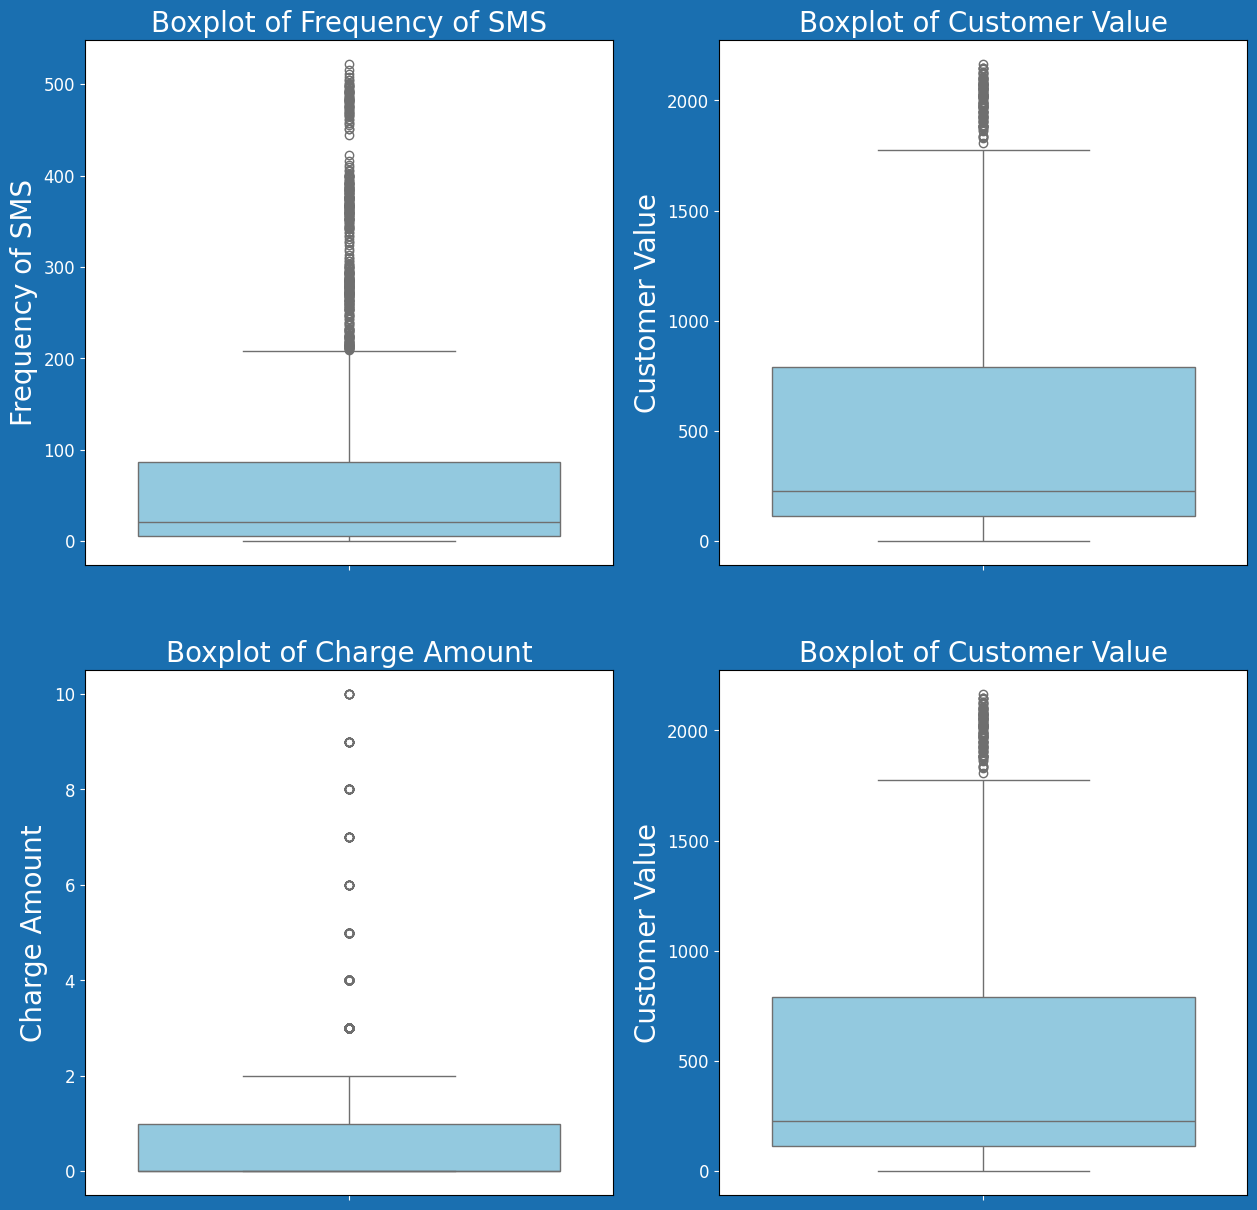

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.patch.set_facecolor('#1A6FB0')

sns.boxplot(ax=axes[0,0], data=df['Frequency of SMS'],color='skyblue')
axes[0,0].set_title('Boxplot of Frequency of SMS',color='#FFFFFF',fontsize=20)
axes[0,0].set_ylabel('Frequency of SMS',color='#FFFFFF',fontsize=20)

sns.boxplot(ax=axes[0,1], data=df['Customer Value'],color='skyblue')
axes[0,1].set_title('Boxplot of Customer Value',color='#FFFFFF',fontsize=20)
axes[0,1].set_ylabel('Customer Value',color='#FFFFFF',fontsize=20)

sns.boxplot(ax=axes[1,0], data=df['Charge  Amount'],color='skyblue')
axes[1,0].set_title('Boxplot of Charge Amount',color='#FFFFFF',fontsize=20)
axes[1,0].set_ylabel('Charge Amount',color='#FFFFFF',fontsize=20)

sns.boxplot(ax=axes[1,1], data=df['Customer Value'],color='skyblue')
axes[1,1].set_title('Boxplot of Customer Value',color='#FFFFFF',fontsize=20)
axes[1,1].set_ylabel('Customer Value',color='#FFFFFF',fontsize=20)

for ax in axes.flatten():
    ax.tick_params(axis='x', colors='#FFFFFF', labelsize=12)
    ax.tick_params(axis='y', colors='#FFFFFF',labelsize=12)

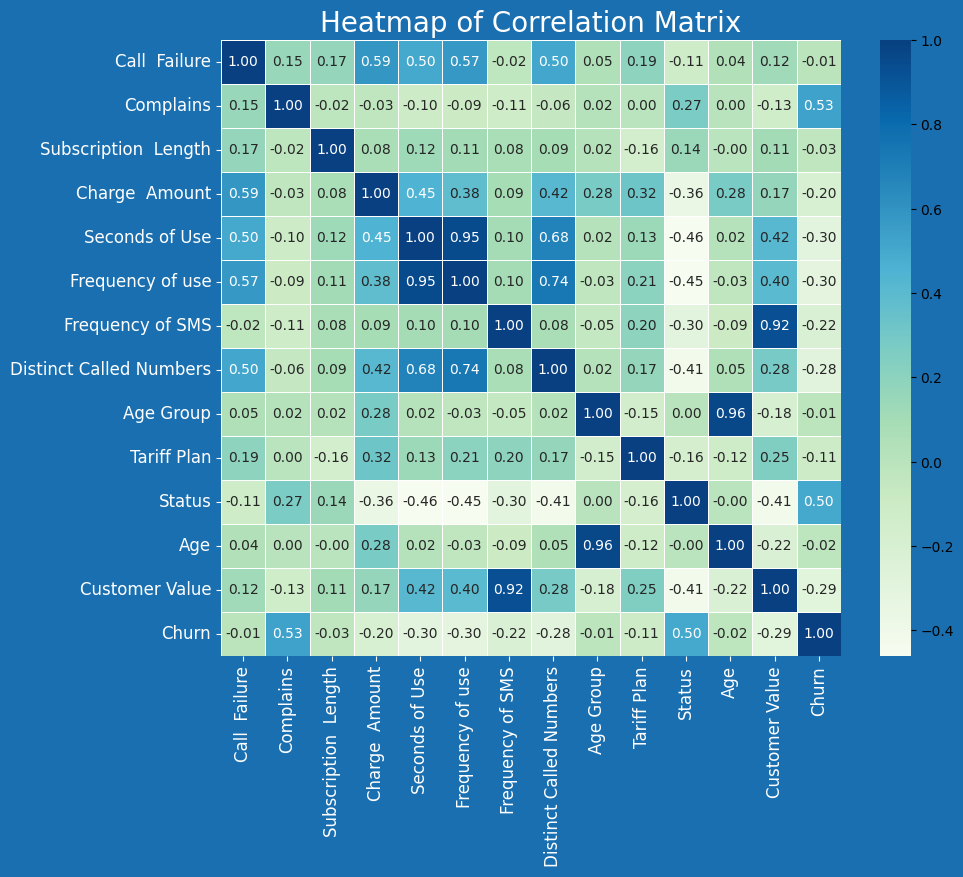

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="GnBu", linewidths=0.5)
ax.tick_params(axis='x', colors='#FFFFFF', labelsize=12)
ax.tick_params(axis='y', colors='#FFFFFF', labelsize=12)
ax.set_title('Heatmap of Correlation Matrix', color='#FFFFFF', fontsize=20)
ax.set_facecolor('#1A6FB0')
plt.gcf().set_facecolor('#1A6FB0')
plt.show()

In [ ]:
df.corr()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
Call Failure,1.000000,0.152879,0.169737,0.589028,0.501607,0.573349,-0.022282,0.504058,0.050406,0.192285,-0.114645,0.041758,0.121225,-0.008987
Complains,0.152879,1.000000,-0.020286,-0.033948,-0.104952,-0.090774,-0.111633,-0.058199,0.019976,0.001140,0.271405,0.003298,-0.132895,0.532053
Subscription Length,0.169737,-0.020286,1.000000,0.078789,0.124618,0.106534,0.076318,0.092009,0.021453,-0.159680,0.142841,-0.002430,0.109565,-0.032588
Charge Amount,0.589028,-0.033948,0.078789,1.000000,0.446738,0.379096,0.091533,0.415198,0.279679,0.324232,-0.356269,0.278955,0.169428,-0.202305
Seconds of Use,0.501607,-0.104952,0.124618,0.446738,1.000000,0.946489,0.102123,0.676536,0.020060,0.133593,-0.460618,0.020843,0.415087,-0.298935
Frequency of use,0.573349,-0.090774,0.106534,0.379096,0.946489,1.000000,0.100019,0.736114,-0.032544,0.206452,-0.454752,-0.028350,0.401572,-0.303337
Frequency of SMS,-0.022282,-0.111633,0.076318,0.091533,0.102123,0.100019,1.000000,0.079650,-0.053719,0.195686,-0.296164,-0.092798,0.924877,-0.220754
Distinct Called Numbers,0.504058,-0.058199,0.092009,0.415198,0.676536,0.736114,0.079650,1.000000,0.020941,0.172079,-0.413039,0.051037,0.284807,-0.278867
Age Group,0.050406,0.019976,0.021453,0.279679,0.020060,-0.032544,-0.053719,0.020941,1.000000,-0.150593,0.002506,0.960758,-0.183481,-0.014550
Tariff Plan,0.192285,0.001140,-0.159680,0.324232,0.133593,0.206452,0.195686,0.172079,-0.150593,1.000000,-0.164143,-0.119426,0.252298,-0.105853


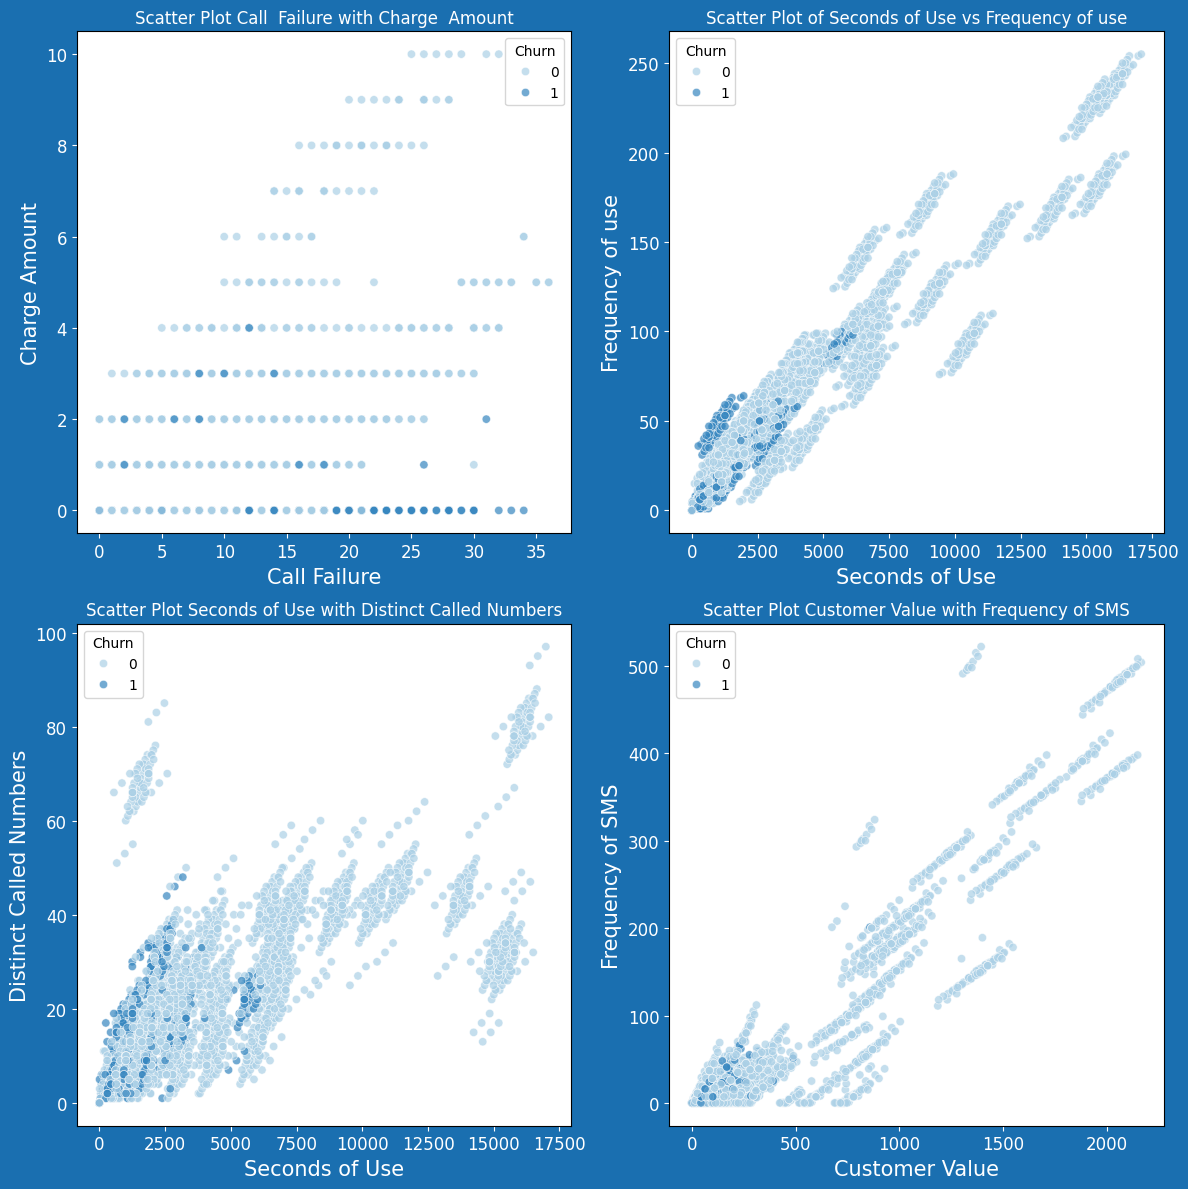

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.patch.set_facecolor('#1A6FB0')

sns.scatterplot(ax=axes[0,0],x='Call  Failure', y='Charge  Amount', palette='Blues',hue='Churn', data = df,alpha=0.7)
axes[0,0].set_title('Scatter Plot Call  Failure with Charge  Amount',color='#FFFFFF', fontsize=12)
axes[0,0].set_xlabel('Call Failure', fontsize=15, color='#FFFFFF')
axes[0,0].set_ylabel('Charge Amount', fontsize=15, color='#FFFFFF')

sns.scatterplot(ax=axes[0,1],x='Seconds of Use', y='Frequency of use',palette='Blues', hue='Churn', data=df, alpha=0.7)
axes[0,1].set_title('Scatter Plot of Seconds of Use vs Frequency of use',color='#FFFFFF', fontsize=12)
axes[0,1].set_xlabel('Seconds of Use', fontsize=15, color='#FFFFFF')
axes[0,1].set_ylabel('Frequency of use', fontsize=15, color='#FFFFFF')

sns.scatterplot(ax=axes[1,0],x='Seconds of Use', y='Distinct Called Numbers', palette='Blues',hue='Churn', data = df,alpha=0.7)
axes[1,0].set_title('Scatter Plot Seconds of Use with Distinct Called Numbers', color='#FFFFFF', fontsize=12)
axes[1,0].set_xlabel('Seconds of Use', fontsize=15, color='#FFFFFF')
axes[1,0].set_ylabel('Distinct Called Numbers', fontsize=15, color='#FFFFFF')

sns.scatterplot(ax=axes[1,1],x='Customer Value', y='Frequency of SMS', palette='Blues',hue='Churn', data = df,alpha=0.7)
axes[1,1].set_title('Scatter Plot Customer Value with Frequency of SMS',color='#FFFFFF', fontsize=12)
axes[1,1].set_xlabel('Customer Value', fontsize=15, color='#FFFFFF')
axes[1,1].set_ylabel('Frequency of SMS', fontsize=15, color='#FFFFFF')

for ax in axes.flatten():
    ax.tick_params(axis='x', colors='#FFFFFF', labelsize=12)
    ax.tick_params(axis='y', colors='#FFFFFF', labelsize=12)
plt.tight_layout()
plt.show()

## Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(['Churn'],axis=1)
y=df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

In [ ]:
# Apply StandardScaler to training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df1 = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df1.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
count,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03
mean,-1.409807e-18,2.396672e-17,-5.145796e-17,-1.085551e-16,1.127846e-17,1.268826e-17,5.498247e-17,7.824429e-17,-2.142907e-16,1.776357e-16,-1.170140e-16,-2.114711e-17,-8.458842e-17
std,1.000198e+00,1.000198e+00,1.000198e+00,1.000198e+00,1.000198e+00,1.000198e+00,1.000198e+00,1.000198e+00,1.000198e+00,1.000198e+00,1.000198e+00,1.000198e+00,1.000198e+00
min,-1.040802e+00,-2.871833e-01,-3.439455e+00,-6.190459e-01,-1.070365e+00,-1.216166e+00,-6.550255e-01,-1.368636e+00,-2.045209e+00,-2.928121e-01,-5.657410e-01,-1.813430e+00,-9.148202e-01
25%,-9.052064e-01,-2.871833e-01,-4.091715e-01,-6.190459e-01,-7.366787e-01,-7.344065e-01,-6.021472e-01,-7.900867e-01,-9.208796e-01,-2.928121e-01,-5.657410e-01,-6.745282e-01,-6.960275e-01
50%,-2.272298e-01,-2.871833e-01,2.901247e-01,-6.190459e-01,-3.504360e-01,-2.786877e-01,-4.699517e-01,-1.536828e-01,2.034501e-01,-2.928121e-01,-5.657410e-01,-1.050773e-01,-4.719095e-01
75%,5.863422e-01,-2.871833e-01,6.397728e-01,3.041108e-02,4.667932e-01,4.504624e-01,1.403511e-01,5.984309e-01,2.034501e-01,-2.928121e-01,-5.657410e-01,-1.050773e-01,6.074326e-01
max,3.840630e+00,3.482097e+00,1.688717e+00,5.875524e+00,2.975536e+00,3.210816e+00,3.883689e+00,4.243290e+00,2.452110e+00,3.415160e+00,1.767593e+00,2.742178e+00,3.194167e+00


In [ ]:
df2 = pd.DataFrame(X_test_scaled, columns=X_test.columns)
df2

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
0,0.857533,-0.287183,0.872872,1.329325,0.708742,0.571987,1.116395,0.251301,0.20345,-0.292812,-0.565741,-0.105077,1.205262
1,-0.634016,-0.287183,0.523223,-0.619046,0.707085,0.988645,2.729181,1.119125,-0.92088,-0.292812,-0.565741,-0.674528,3.046422
2,-1.040802,-0.287183,-0.525721,-0.619046,-0.323921,-0.070359,-0.655025,-0.211538,-0.92088,-0.292812,-0.565741,-0.674528,-0.637830
3,1.806700,-0.287183,0.057026,1.329325,2.681977,2.846241,-0.628586,3.375466,-0.92088,-0.292812,-0.565741,-0.674528,0.494998
4,2.077891,-0.287183,-1.691215,0.679868,1.284496,2.047648,0.120522,1.061270,2.45211,-0.292812,-0.565741,2.742178,-0.371711
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,-0.905206,-0.287183,-0.059523,-0.619046,0.468450,0.172691,0.913695,0.077737,0.20345,-0.292812,-0.565741,-0.105077,0.949946
626,-1.040802,-0.287183,-0.758820,-0.619046,-0.875054,-1.042559,-0.469952,-1.195071,1.32778,-0.292812,1.767593,1.603276,-0.774513
627,0.179556,-0.287183,-1.225017,-0.619046,-0.904646,-0.886313,-0.637399,-1.021506,-0.92088,-0.292812,1.767593,-0.674528,-0.835742
628,-0.227230,-0.287183,0.756322,0.679868,0.495676,0.363659,0.966573,0.077737,0.20345,-0.292812,-0.565741,-0.105077,1.005476


## Resampling

In [ ]:
from collections import Counter

In [ ]:
# Under-Sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)


In [ ]:
# fit predictor and target varialbe
X_rus, y_rus = rus.fit_resample(X_train_scaled, y_train)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 2655, 1: 495})
Resample dataset shape Counter({0: 385, 1: 385})


# Model training

In [ ]:
## Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, precision_score, recall_score
from sklearn import metrics

## 1. Logistic Regression

In [ ]:
# Define the parameter grid
param_grid_LR = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'penalty': ['l2']
}

In [ ]:
# Model
model_LR = LogisticRegression()

In [ ]:
# Setup the GridSearchCV
grid_search_LR = GridSearchCV(model_LR, param_grid_LR, cv=5, scoring='accuracy')
grid_search_LR.fit(X_rus, y_rus)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='accuracy')

In [ ]:
# Print best parameters
print(f"Best parameters: {grid_search_LR.best_params_}")
print(f"Best score: {grid_search_LR.best_score_}")

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.8753246753246753


In [ ]:
# Fit the model
model_LR = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')

In [ ]:
model_LR.fit(X_rus, y_rus)

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
y_pred_LR = model_LR.predict(X_test_scaled)

In [ ]:
# Evaluate on test set
accuracy_LR = accuracy_score(y_test, y_pred_LR)
f1_LR = f1_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR)
recall_LR = recall_score(y_test, y_pred_LR)
print("accuracy_LR:", accuracy_LR)
print("f1_LR:", f1_LR)
print("precision_LR:", precision_LR)
print("recall_LR:", recall_LR)

accuracy_LR: 0.8158730158730159
f1_LR: 0.6233766233766235
precision_LR: 0.48484848484848486
recall_LR: 0.8727272727272727


In [ ]:
#Classification report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       520
           1       0.48      0.87      0.62       110

    accuracy                           0.82       630
   macro avg       0.73      0.84      0.75       630
weighted avg       0.88      0.82      0.83       630



In [ ]:
# Cofusion matrix
cnf_matrix_LR = metrics.confusion_matrix(y_test, y_pred_LR)
cnf_matrix_LR

array([[418, 102],
       [ 14,  96]])

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

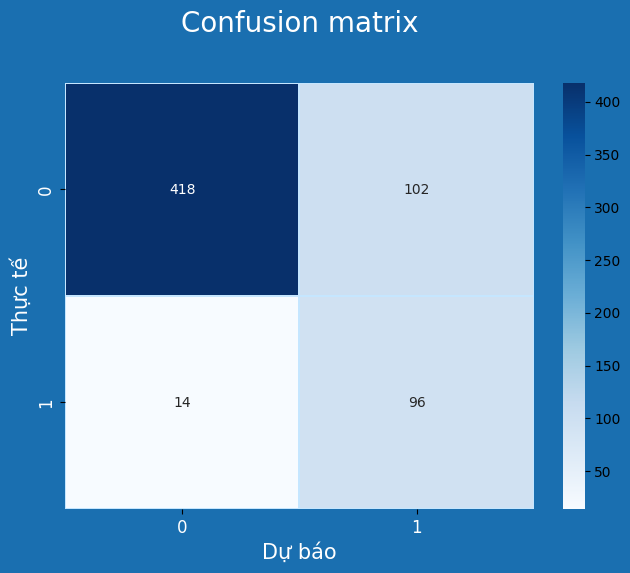

In [ ]:
# Cofusion matrix chart
sns.heatmap(pd.DataFrame(cnf_matrix_LR), annot=True, cmap="Blues" ,fmt='g',linewidths=0.01, linecolor='#C5E6FF')
plt.gcf().set_facecolor('#1A6FB0')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1,color='#FFFFFF',fontsize=20)
plt.ylabel('Thực tế',color='#FFFFFF',fontsize=15)
plt.xlabel('Dự báo',color='#FFFFFF',fontsize=15)
plt.xticks(color='white',fontsize=12)
plt.yticks(color='white',fontsize=12)

## 2. Decision Tree

In [ ]:
# Define the parameter grid
grid_search_DT = {'max_depth':[2, 4, 8],
              'min_samples_split':[2, 5, 10],
              'min_samples_leaf':[1, 4, 8]}

In [ ]:
# Model
model_DT = DecisionTreeClassifier()

In [ ]:
# Setup the GridSearchCV
grid_search_DT = GridSearchCV(model_DT, grid_search_DT, cv=5)
grid_search_DT.fit(X_rus, y_rus)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 8], 'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# Print best parameters
print(f"Best parameters: {grid_search_DT.best_params_}")
print(f"Best score: {grid_search_DT.best_estimator_}")

Best parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: DecisionTreeClassifier(max_depth=8, min_samples_split=5)


In [ ]:
# Fit the model
model_DT = DecisionTreeClassifier(max_depth=8,min_samples_leaf=1,min_samples_split=10)
model_DT.fit(X_rus, y_rus)
y_pred_DT = model_LR.predict(X_test_scaled)

In [ ]:
# Evaluate on test set
accuracy_DT = accuracy_score(y_test, y_pred_DT)
f1_DT = f1_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT)
print("accuracy_DT:", accuracy_DT)
print("f1_DT:", f1_DT)
print("precision_DT:", precision_DT)
print("recall_DT:", recall_DT)

accuracy_DT: 0.8158730158730159
f1_DT: 0.6233766233766235
precision_DT: 0.48484848484848486
recall_DT: 0.8727272727272727


In [ ]:
#Classification report
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       520
           1       0.48      0.87      0.62       110

    accuracy                           0.82       630
   macro avg       0.73      0.84      0.75       630
weighted avg       0.88      0.82      0.83       630



In [ ]:
# Cofusion matrix
cnf_matrix_DT = metrics.confusion_matrix(y_test, y_pred_DT)
cnf_matrix_DT

array([[418, 102],
       [ 14,  96]])

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

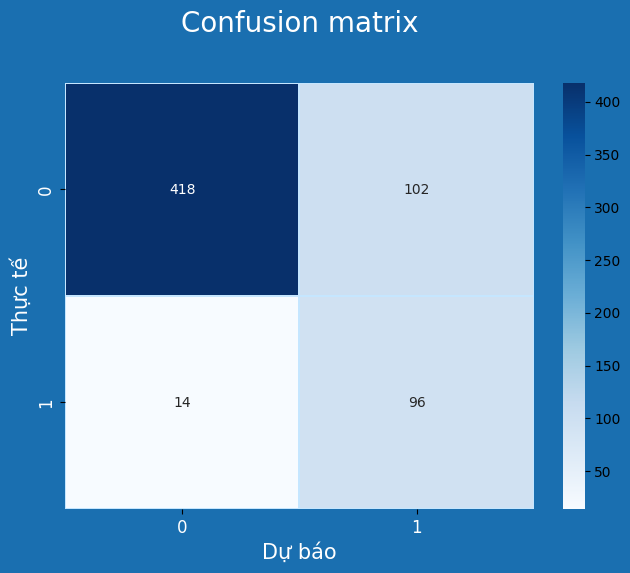

In [ ]:
# Cofusion matrix chart
sns.heatmap(pd.DataFrame(cnf_matrix_DT), annot=True, cmap="Blues" ,fmt='g',linewidths=0.01, linecolor='#C5E6FF')
plt.gcf().set_facecolor('#1A6FB0')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1,color='#FFFFFF',fontsize=20)
plt.ylabel('Thực tế',color='#FFFFFF',fontsize=15)
plt.xlabel('Dự báo',color='#FFFFFF',fontsize=15)
plt.xticks(color='white',fontsize=12)
plt.yticks(color='white',fontsize=12)

## 3. Random Forest

In [ ]:
# Define the parameter grid
param_grid_RF = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

In [ ]:
# Model
model_RF = RandomForestClassifier()

In [ ]:
# Setup the GridSearchCV
grid_search_RF = GridSearchCV(model_RF, param_grid_RF, cv=5, scoring='accuracy')
grid_search_RF.fit(X_rus, y_rus)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [ ]:
# Print best parameters
print(f"Best parameters: {grid_search_RF.best_params_}")
print(f"Best score: {grid_search_RF.best_score_}")

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.925974025974026


In [ ]:
# Fit the model
model_RF = RandomForestClassifier(n_estimators=100, max_features ='auto' , max_depth = 10, min_samples_split = 2, min_samples_leaf = 1, bootstrap = True )
model_RF.fit(X_rus, y_rus)
y_pred_RF = model_RF.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
# Evaluate on test set
accuracy_RF = accuracy_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF)
recall_RF = recall_score(y_test, y_pred_RF)
print("accuracy_RF:", accuracy_RF)
print("f1_RF:", f1_RF)
print("precision_RF:", precision_RF)
print("recall_RF:", recall_RF)

accuracy_RF: 0.8793650793650793
f1_RF: 0.7246376811594203
precision_RF: 0.6024096385542169
recall_RF: 0.9090909090909091


In [ ]:
#Classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       520
           1       0.60      0.91      0.72       110

    accuracy                           0.88       630
   macro avg       0.79      0.89      0.82       630
weighted avg       0.91      0.88      0.89       630



In [ ]:
# Cofusion matrix
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_pred_RF)
cnf_matrix_RF

array([[454,  66],
       [ 10, 100]])

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

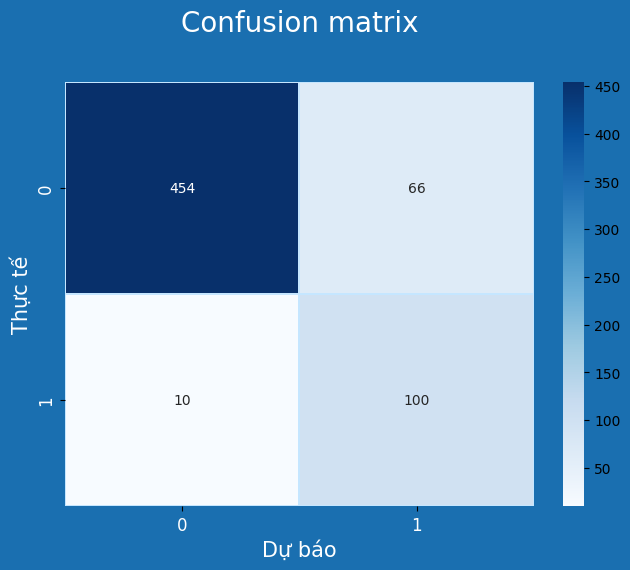

In [ ]:
# Cofusion matrix chart
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True,cmap="Blues" ,fmt='g',linewidths=0.01, linecolor='#C5E6FF')
plt.gcf().set_facecolor('#1A6FB0')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1,color='#FFFFFF',fontsize=20)
plt.ylabel('Thực tế',color='#FFFFFF',fontsize=15)
plt.xlabel('Dự báo',color='#FFFFFF',fontsize=15)
plt.xticks(color='white',fontsize=12)
plt.yticks(color='white',fontsize=12)

## 4. KNeighbors - KNN

In [ ]:
# Define the parameter grid
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [ ]:
# Model
model_KNN = KNeighborsClassifier()

In [ ]:
# Setup the GridSearchCV
grid_search_KNN = GridSearchCV(model_KNN,param_grid_KNN, cv=5, scoring='accuracy')
grid_search_KNN.fit(X_rus, y_rus)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Print best parameters
print(f"Best parameters: {grid_search_KNN.best_params_}")
print(f"Best score: {grid_search_KNN.best_score_}")

Best parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best score: 0.9311688311688313


In [ ]:
# Fit the model
model_KNN = KNeighborsClassifier(n_neighbors=3, weights='distance',  algorithm= 'auto',p =2)
model_KNN.fit(X_rus, y_rus)
y_pred_KNN= model_KNN.predict(X_test_scaled)

In [ ]:
# Evaluate on test set
accuracy_KNN =accuracy_score(y_test, y_pred_KNN)
f1_KNN = f1_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN)
recall_KNN = recall_score(y_test, y_pred_KNN)
print("accuracy_KNN:", accuracy_KNN)
print("f1_KNN:", f1_KNN)
print("precision_KNN:", precision_KNN)
print("recall_KNN:", recall_KNN)

accuracy_KNN: 0.9015873015873016
f1_KNN: 0.7596899224806202
precision_KNN: 0.6621621621621622
recall_KNN: 0.8909090909090909


In [ ]:
#Classification report
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       520
           1       0.66      0.89      0.76       110

    accuracy                           0.90       630
   macro avg       0.82      0.90      0.85       630
weighted avg       0.92      0.90      0.91       630



In [ ]:
# Cofusion matrix
cnf_matrix_KNN = metrics.confusion_matrix(y_test, y_pred_KNN)
cnf_matrix_KNN

array([[470,  50],
       [ 12,  98]])

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

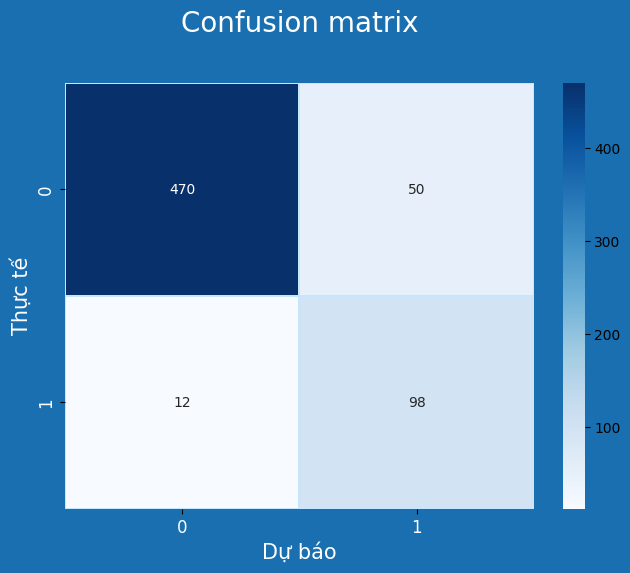

In [ ]:
# Cofusion matrix chart
sns.heatmap(pd.DataFrame(cnf_matrix_KNN), annot=True, cmap="Blues" ,fmt='g',linewidths=0.01, linecolor='#C5E6FF')
plt.gcf().set_facecolor('#1A6FB0')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1,color='#FFFFFF',fontsize=20)
plt.ylabel('Thực tế',color='#FFFFFF',fontsize=15)
plt.xlabel('Dự báo',color='#FFFFFF',fontsize=15)
plt.xticks(color='white',fontsize=12)
plt.yticks(color='white',fontsize=12)

## 5. SVC

In [ ]:
# Define the parameter grid
param_grid_SVC = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [ ]:
# Model
model_SVC = SVC()

In [ ]:
# Setup the GridSearchCV
grid_search_SVC = GridSearchCV(model_SVC, param_grid_SVC, cv=5, scoring='accuracy')
grid_search_SVC.fit(X_rus, y_rus)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
# Print best parameters
print(f"Best parameters: {grid_search_SVC.best_params_}")
print(f"Best score: {grid_search_SVC.best_score_}")

Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best score: 0.9207792207792208


In [ ]:
# Fit the model
model_SVC = SVC(C=10, kernel='rbf',gamma = 'auto')
model_SVC.fit(X_rus, y_rus)
y_pred_SVC= model_SVC.predict(X_test_scaled)

In [ ]:
# Evaluate on test set
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
f1_SVC = f1_score(y_test, y_pred_SVC)
precision_SVC = precision_score(y_test, y_pred_SVC)
recall_SVC = recall_score(y_test, y_pred_SVC)
print("accuracy_SVC:", accuracy_SVC)
print("f1_SVC:", f1_SVC)
print("precision_SVC:", precision_SVC)
print("recall_SVC:", recall_SVC)

accuracy_SVC: 0.8968253968253969
f1_SVC: 0.7601476014760147
precision_SVC: 0.639751552795031
recall_SVC: 0.9363636363636364


In [ ]:
#Classification report
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93       520
           1       0.64      0.94      0.76       110

    accuracy                           0.90       630
   macro avg       0.81      0.91      0.85       630
weighted avg       0.92      0.90      0.90       630



In [ ]:
# Cofusion matrix
cnf_matrix_SVC = metrics.confusion_matrix(y_test, y_pred_SVC)
cnf_matrix_SVC

array([[462,  58],
       [  7, 103]])

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

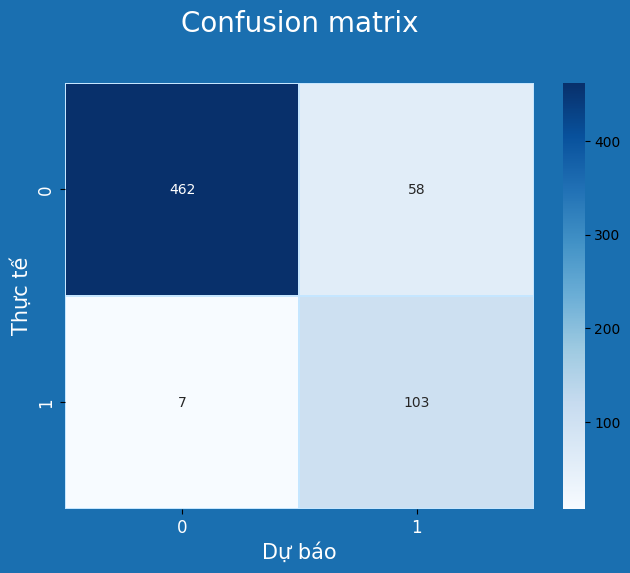

In [ ]:
# Cofusion matrix chart
sns.heatmap(pd.DataFrame(cnf_matrix_SVC), annot=True, cmap="Blues" ,fmt='g',linewidths=0.01, linecolor='#C5E6FF')
plt.tight_layout()
plt.gcf().set_facecolor('#1A6FB0')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1,color='#FFFFFF',fontsize=20)
plt.ylabel('Thực tế',color='#FFFFFF',fontsize=15)
plt.xlabel('Dự báo',color='#FFFFFF',fontsize=15)
plt.xticks(color='white',fontsize=12)
plt.yticks(color='white',fontsize=12)

# Chose best model

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Neighbors', 'Support Vector Classifier']
accuracy_scores = [accuracy_LR,accuracy_DT, accuracy_RF, accuracy_KNN, accuracy_SVC]
f1_scores = [f1_LR,f1_DT, f1_RF, f1_KNN, f1_SVC]
precision_scores = [precision_LR,precision_DT, precision_RF, precision_KNN, precision_SVC]
recall_scores = [recall_LR,recall_DT, recall_RF, recall_KNN, recall_SVC]

In [ ]:
data = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
})
data

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.815873,0.623377,0.484848,0.872727
1,Decision Tree,0.815873,0.623377,0.484848,0.872727
2,Random Forest,0.879365,0.724638,0.602410,0.909091
3,K-Neighbors,0.901587,0.759690,0.662162,0.890909
4,Support Vector Classifier,0.896825,0.760148,0.639752,0.936364


In [ ]:
reports = {}

report_LR = classification_report(y_test, y_pred_LR)
reports['Logistic Regression'] = report_LR

report_DT = classification_report(y_test, y_pred_DT)
reports['Decision Tree'] = report_DT

report_RF = classification_report(y_test, y_pred_RF)
reports['Random Forest'] = report_RF

report_KNN = classification_report(y_test, y_pred_KNN)
reports['K-Neighbors'] = report_KNN

report_SVC = classification_report(y_test, y_pred_SVC)
reports['Support Vector Classifier'] = report_SVC

for model, report in reports.items():
    print(f"Classification Report for {model}:")
    print(report)
    print("-----------------------------------------")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       520
           1       0.48      0.87      0.62       110

    accuracy                           0.82       630
   macro avg       0.73      0.84      0.75       630
weighted avg       0.88      0.82      0.83       630

-----------------------------------------
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       520
           1       0.48      0.87      0.62       110

    accuracy                           0.82       630
   macro avg       0.73      0.84      0.75       630
weighted avg       0.88      0.82      0.83       630

-----------------------------------------
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       520
           1       0.60 